In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('dataset.csv')
Numerical=["Application order", "Age at enrollment", "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)", "Curricular units 1st sem (without evaluations)", "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (grade)", "Curricular units 2nd sem (without evaluations)", "Unemployment rate", "Inflation rate", "GDP"]
Categorical=["Marital status", "Application mode", "Course", "Daytime/evening attendance", "Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Displaced", "Educational special needs", "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder", "International", "Target"]


# print(df.dtypes)

le = LabelEncoder()

# Iterate over all the columns in the dataframe
for col in df.columns:
    # Check if the column is categorical
    if df[col].dtype == 'object':
        # Convert the column to numerical values
        df[col] = le.fit_transform(df[col])

In [2]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    labels=None

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)
    
    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)
    
    def inertia(self, X, labels, centroids):
         distance = np.zeros(X.shape[0])
         for k in range(self.n_clusters):
             distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
         return np.sum(np.square(distance))
    
    def intra_cluster_distance(self, X, labels, dp_id):
        cluster_id = labels[dp_id]
        datapoint = X[dp_id]
        cluster = X[labels == cluster_id]

        size = len(cluster)
        similarity = 0.0

        for index, dp in enumerate(cluster):
            if index != dp_id:
                similarity += np.linalg.norm(datapoint - dp)

        return similarity / size

    def inter_cluster_distance(self, X, labels, dp_id):
        all_clusters = np.unique(labels).tolist()
        cluster_id = labels[dp_id]
        datapoint = X[dp_id]

        dissimilarity = 0.0
        least_dissimilarity = float('inf')

        for cluster in all_clusters:
            if cluster != cluster_id:
                cluster = X[labels == cluster]
                size = len(cluster)
                similarity = 0.0

                for dp in cluster:
                    similarity += np.linalg.norm(datapoint - dp)

                dissimilarity = similarity / size
                if dissimilarity < least_dissimilarity:
                    least_dissimilarity = dissimilarity

        return least_dissimilarity

    def silhouette_score(self, X, labels):
        score = 0.0

        for index, dp in enumerate(X):
            a = self.intra_cluster_distance(X, labels, index)
            b = self.inter_cluster_distance(X, labels, index)
            score += (b - a) / max(a, b)
        
        return score / len(X)
    
    def silhouette_samples(self, X,labels):
        score = []

        for index, dp in enumerate(X):
            a = self.intra_cluster_distance(X, labels, index)
            b = self.inter_cluster_distance(X, labels, index)
            score.append((b - a) / max(a, b))
        
        return np.array(score)
        


In [3]:
#unsupervised machine learning algorithms (say K-means, kNN and SOM) and compare the results
#cluster estimation using the two techniques (e.g., silhouette coefficient and inertia) must be performed
X = df.drop('Target', axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


In [4]:
# Algorithm 1 say SOM: change the number of clusters (e.g., k = 3, 4, 5) and present the answers graphically. Comment on results.

# Algorithm 2 suppose K-means: change the number of clusters (e.g., k = 3, 4, 5) and present the answers graphically. 
#Also, perform experiments with different attributes. 
# For example, you have a data set of gems, then X = height, Y = width; X = transparency, Y = weight; 

# Calculate the inertia and the Silhouette coefficient, whose answers should be given both graphically and numerically, and commented.

# Compare the results obtained from both algorithms and present your conclusions as to whether the clustering method is appropriate for the data set, what number of clusters is best, what attributes are most appropriate, and so on.

In [15]:
#  Algorithm 2 suppose K-means: change the number of clusters (e.g., k = 3, 4, 5) and present the answers graphically. 
#Also, perform experiments with different attributes. For example, you have a data set of gems, then X = height, Y = width; X = transparency, Y = weight; 
#use K-means algorithm on X data
kmeans3 = Kmeans(n_clusters=3)
kmeans3.fit(X)
kmeans4 = Kmeans(n_clusters=4)
kmeans4.fit(X)
kmeans5 = Kmeans(n_clusters=5)
kmeans5.fit(X)
kmeans15 = Kmeans(n_clusters=15)
kmeans15.fit(X)






In [27]:
def verifyUnsupervised(model, nbclusters):
    # Calculate the Silhouette coefficient, whose answers should be given both graphically and numerically, and commented.
    #use silhouette_score to calculate the silhouette coefficient
    silhouette_avg = model.silhouette_score(X, model.labels)
    print("For n_clusters =", nbclusters,
                "The average silhouette_score is :", silhouette_avg)
    #use silhouette_samples to calculate the silhouette coefficient for each sample
    sample_silhouette_values = model.silhouette_samples(X, model.labels)

    #plot the silhouette coefficient for each sample
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (nbclusters + 1) * 10])
    y_lower = 10
    for i in range(nbclusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[model.labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / nbclusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    plt.show()
    #plot the clusters
    #label of plt
    plt.xlabel('Marital status')
    plt.ylabel('Application mode')
    plt.title('Clusters K-means')
    plt.scatter(X[:, 0], X[:, 1], c=model.labels, cmap='rainbow')
    plt.show()

    plt.xlabel('Curricular units 1st sem (evaluations)')
    plt.ylabel('Curricular units 2nd sem (evaluations)')
    plt.title('Clusters K-means')
    plt.scatter(X[:, 21], X[:, 27], c=model.labels, cmap='rainbow')
    plt.show()


    #Calculate the inertia
    print("The inertia is :", model.inertia(X, model.labels, model.centroids))

def ElbowMethod(X, model, nbclusters):
    inertia = []
    for i in range(1, nbclusters):
        mdl = model(n_clusters=i, random_state=0)
        mdl.fit(X)
        inertia.append(mdl.inertia(X, mdl.labels, mdl.centroids))
    plt.plot(range(1, nbclusters), inertia)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

In [7]:
verifyUnsupervised(kmeans3, 3)



KeyboardInterrupt: 

For n_clusters = 4 The average silhouette_score is : 0.1516340928806237


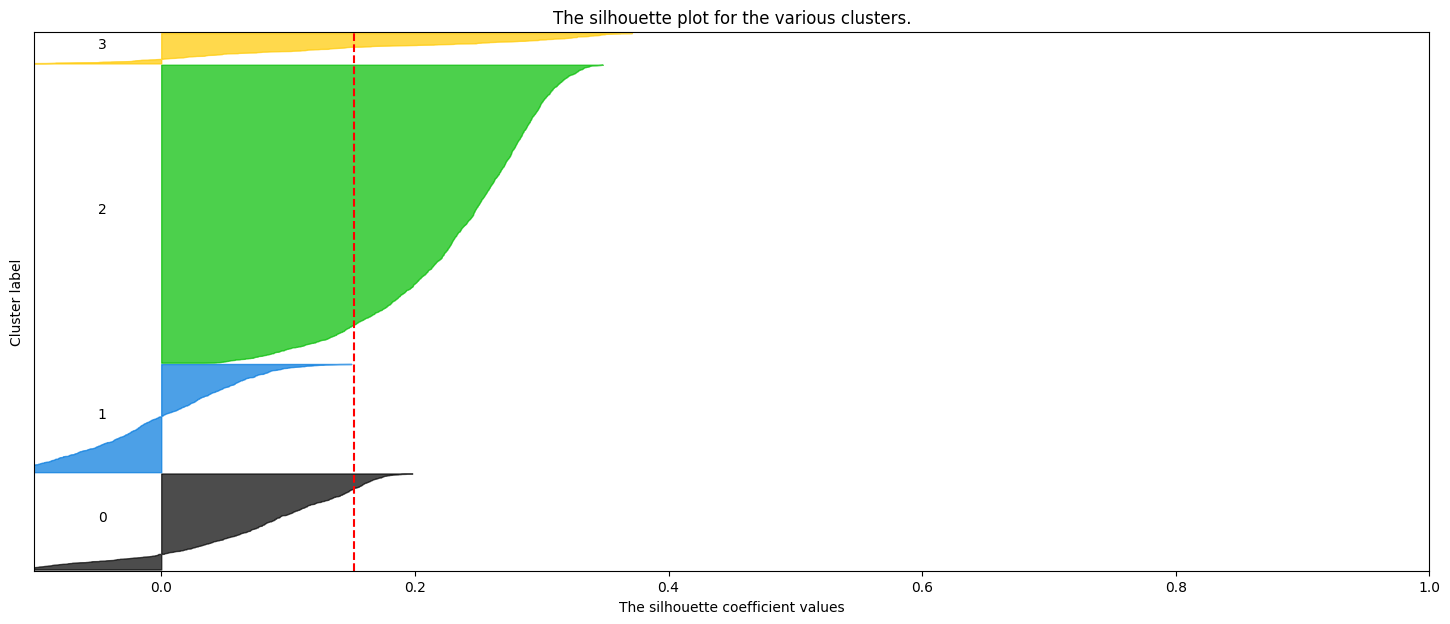

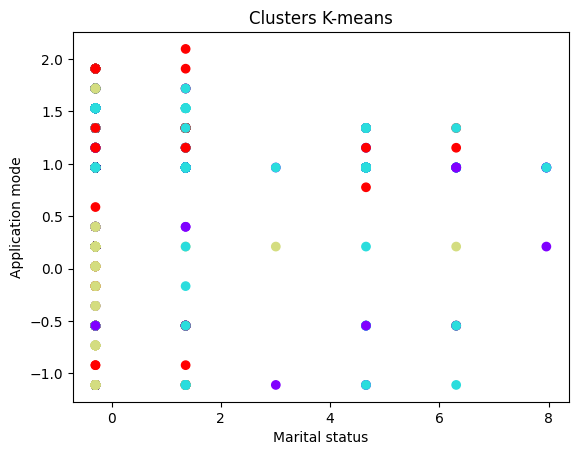

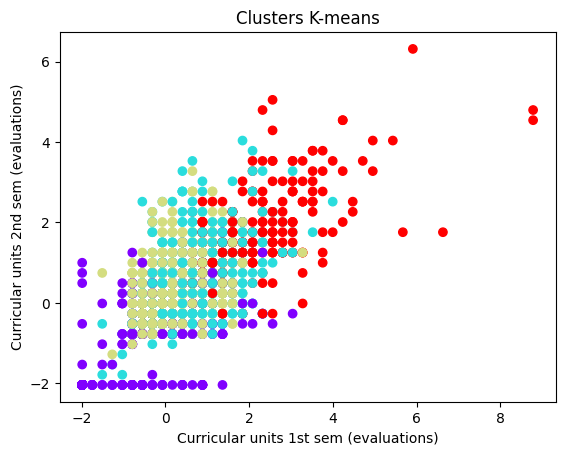

The inertia is : 113187.73772632648


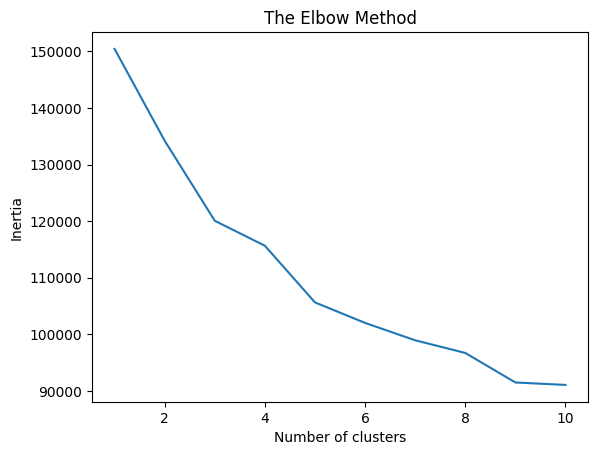

In [ ]:
verifyUnsupervised(kmeans4, 4)

For n_clusters = 5 The average silhouette_score is : 0.07490720282594514


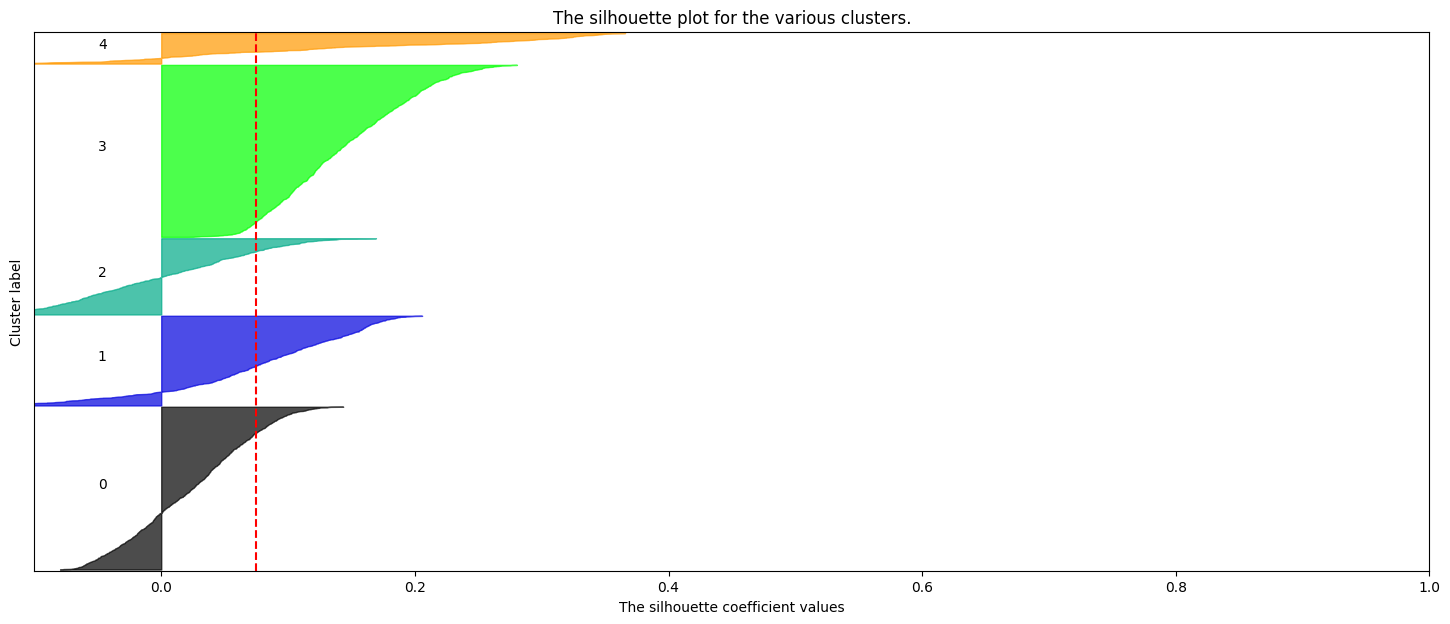

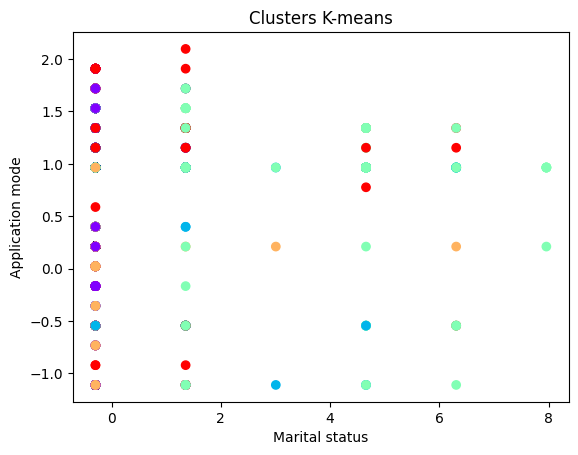

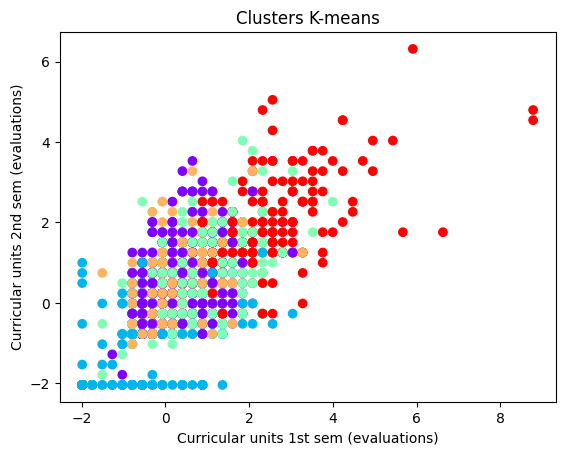

The inertia is : 109336.9570052217


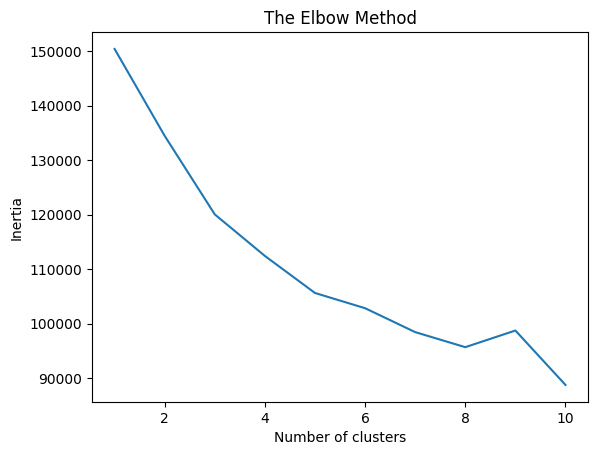

In [ ]:
verifyUnsupervised(kmeans5, 5)

In [ ]:
verifyUnsupervised(kmeans15, 15)

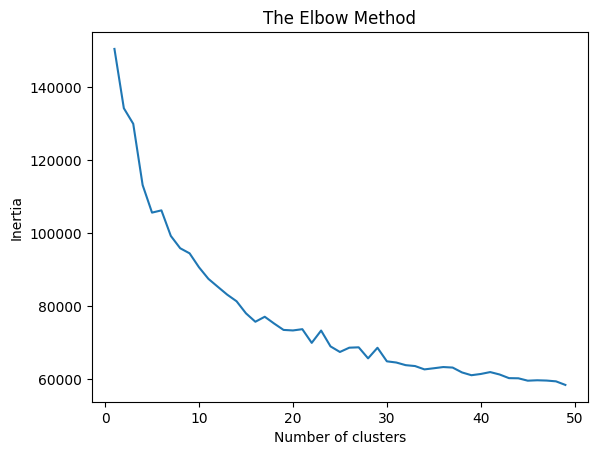

In [14]:
ElbowMethod(X, Kmeans, 50)

In [ ]:
#--------------------------------------------------------------

In [28]:
#Algorithm 1 say SOM: change the number of clusters (e.g., k = 3, 4, 5) and present the answers graphically. Comment on results.
#use SOM algorithm on X data without library
class SOM:
    def __init__(self, n_clusters, n_iter=100, learning_rate=0.01, random_state=0):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.labels = None
        self.centroids = None

    def fit(self, X):
        np.random.seed(self.random_state)
        self.centroids = np.random.uniform(low=0, high=1, size=(self.n_clusters, X.shape[1]))
        for i in range(self.n_iter):
            for x in X:
                self.centroids[np.argmin(norm(x - self.centroids, axis=1))] += self.learning_rate * np.power(0.5,i) * (x - self.centroids[np.argmin(norm(x - self.centroids, axis=1))])
        self.labels = np.argmin(norm(X[:, None] - self.centroids, axis=2), axis=1)

    def predict(self, X):
        return np.argmin(norm(X[:, None] - self.centroids, axis=2), axis=2)


    def inertia(self, X, labels, centroids):
        return np.sum(np.min(norm(X[:, None] - centroids, axis=2), axis=1))

    def intra_cluster_distance(self, X, labels, dp_id):
        cluster_id = labels[dp_id]
        datapoint = X[dp_id]
        cluster = X[labels == cluster_id]

        size = len(cluster)
        similarity = 0.0

        for index, dp in enumerate(cluster):
            if index != dp_id:
                similarity += np.linalg.norm(datapoint - dp)

        return similarity / size

    def inter_cluster_distance(self, X, labels, dp_id):
        all_clusters = np.unique(labels).tolist()
        cluster_id = labels[dp_id]
        datapoint = X[dp_id]

        dissimilarity = 0.0
        least_dissimilarity = float('inf')

        for cluster in all_clusters:
            if cluster != cluster_id:
                cluster = X[labels == cluster]
                size = len(cluster)
                similarity = 0.0

                for dp in cluster:
                    similarity += np.linalg.norm(datapoint - dp)

                dissimilarity = similarity / size
                if dissimilarity < least_dissimilarity:
                    least_dissimilarity = dissimilarity

        return least_dissimilarity

    def silhouette_score(self, X, labels):
        score = 0.0

        for index, dp in enumerate(X):
            a = self.intra_cluster_distance(X, labels, index)
            b = self.inter_cluster_distance(X, labels, index)
            score += (b - a) / max(a, b)
        
        return score / len(X)
    
    def silhouette_samples(self, X,labels):
        score = []

        for index, dp in enumerate(X):
            a = self.intra_cluster_distance(X, labels, index)
            b = self.inter_cluster_distance(X, labels, index)
            score.append((b - a) / max(a, b))
        
        return np.array(score)
    
    

In [30]:
som3 = SOM(n_clusters=3, n_iter=100)
som3.fit(X)
som4 = SOM(n_clusters=4, n_iter=100)
som4.fit(X)
som5 = SOM(n_clusters=5, n_iter=100)
som5.fit(X)
som8 = SOM(n_clusters=8, n_iter=100)
som8.fit(X)

For n_clusters = 3 The average silhouette_score is : 0.33169439219410246


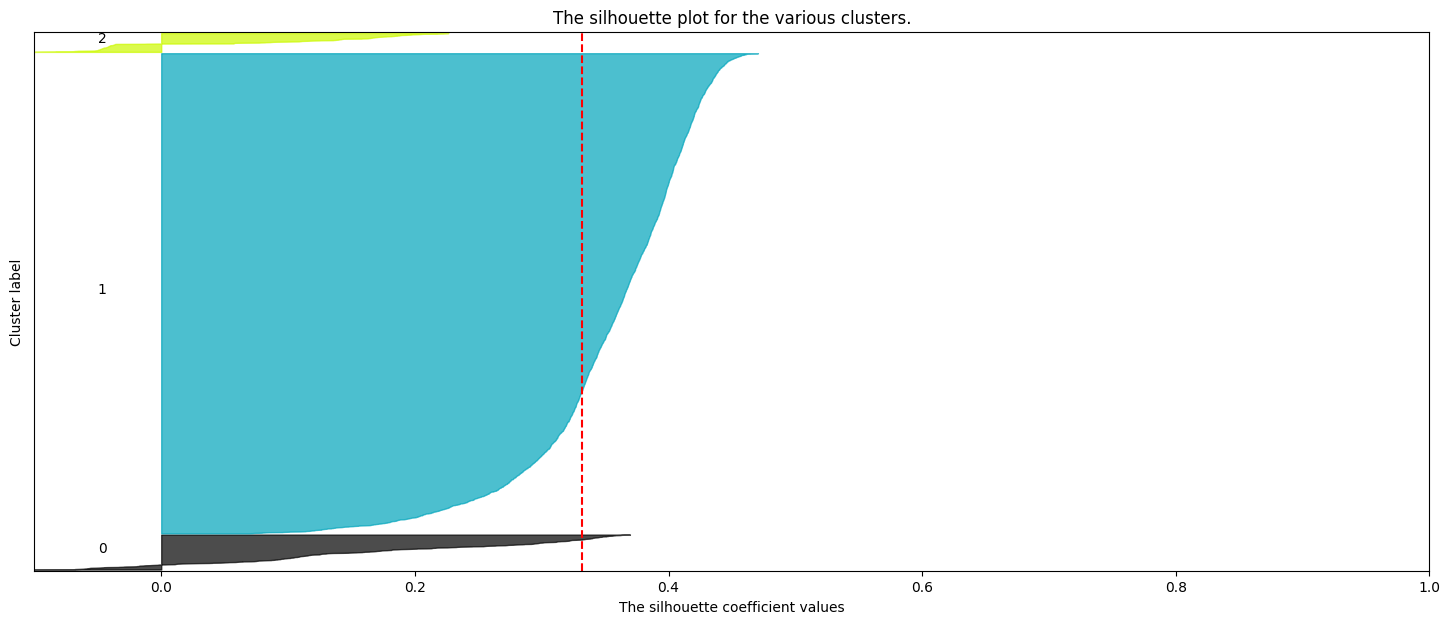

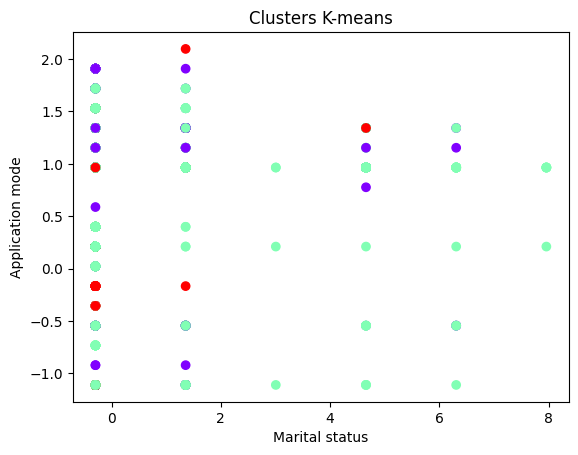

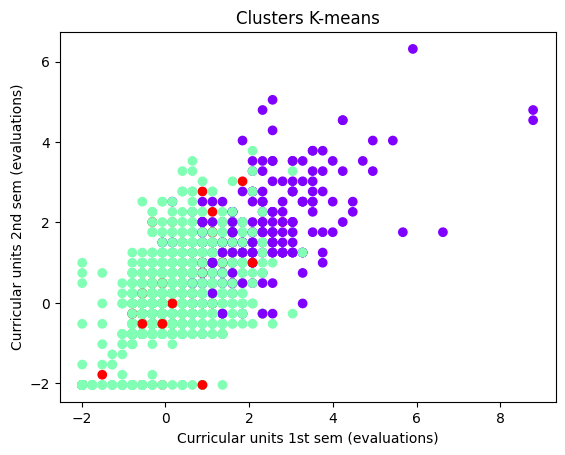

The inertia is : 22511.88089029325


In [23]:
verifyUnsupervised(som3, 3)

In [ ]:
verifyUnsupervised(som4, 4)

In [ ]:
verifyUnsupervised(som5, 5)

For n_clusters = 8 The average silhouette_score is : 0.0859665740740704


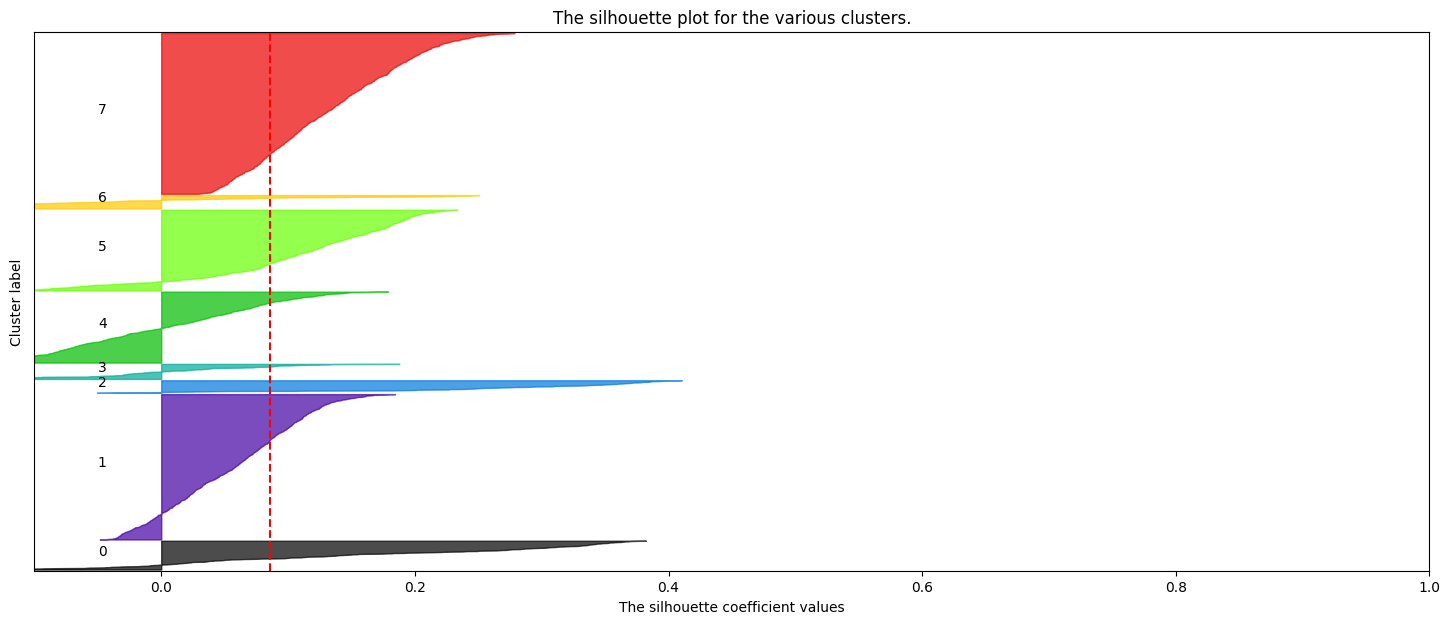

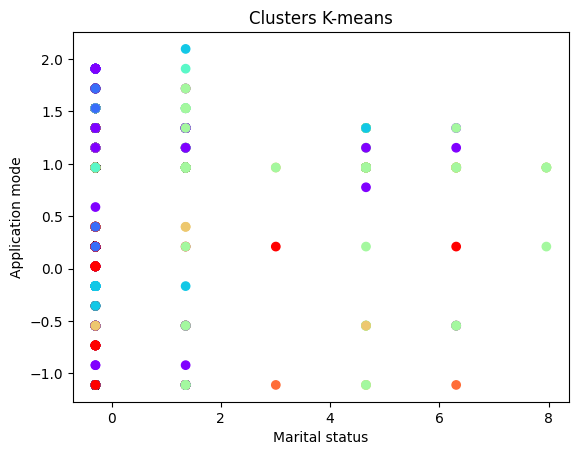

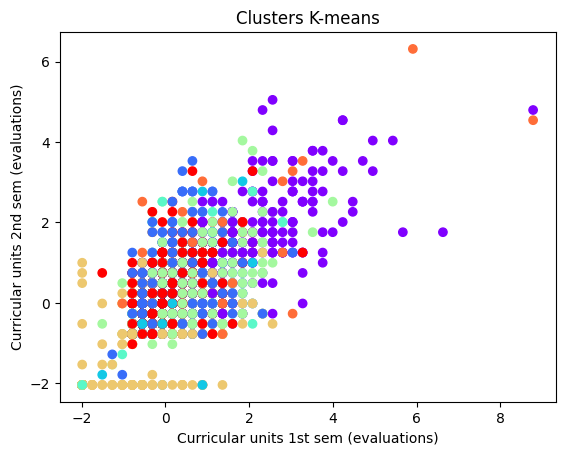

The inertia is : 19516.38194914494


In [31]:
verifyUnsupervised(som8, 8)

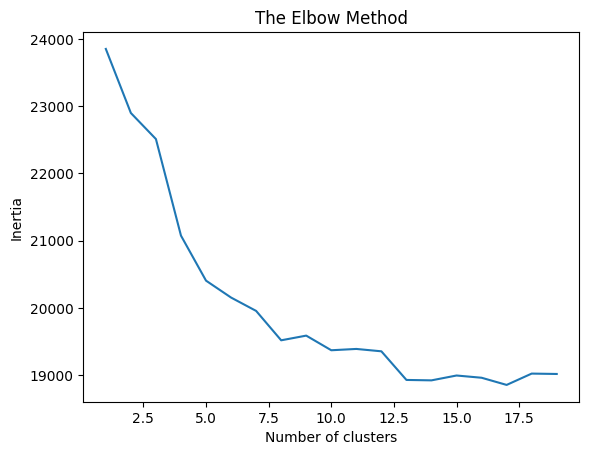

In [29]:
ElbowMethod(X, SOM, 20)

In [ ]:
#--------------------------------------------------------------

In [ ]:
# kNN algorithm: change the number of clusters (e.g., k = 3, 4, 5) and present the answers graphically. Comment on results.

class kNN:
    def __init__(self, n_clusters, n_iter=100, learning_rate=0.01, random_state=0):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.labels = None
        self.centroids = None

    def fit(self, X):
        np.random.seed(self.random_state)
        self.centroids = np.random.uniform(low=0, high=1, size=(self.n_clusters, X.shape[1]))
        for i in range(self.n_iter):
            for x in X:
                self.centroids[np.argmin(norm(x - self.centroids, axis=1))] += self.learning_rate * np.power(0.5,i) * (x - self.centroids[np.argmin(norm(x - self.centroids, axis=1))])
        self.labels = np.argmin(norm(X[:, None] - self.centroids, axis=2), axis=1)

    def predict(self, X):
        return np.argmin(norm(X[:, None] - self.centroids, axis=2), axis=2)


    def inertia(self, X, labels, centroids):
        return np.sum(np.min(norm(X[:, None] - centroids, axis=2), axis=1))

    def intra_cluster_distance(self, X, labels, dp_id):
        cluster_id = labels[dp_id]
        datapoint = X[dp_id]
        cluster = X[labels == cluster_id]

        size = len(cluster)
        similarity = 0.0

        for index, dp in enumerate(cluster):
            if index != dp_id:
                similarity += np.linalg.norm(datapoint - dp)

        return similarity / size

    def inter_cluster_distance(self, X, labels, dp_id):
        all_clusters = np.unique(labels).tolist()
        cluster_id = labels[dp_id]
        datapoint = X[dp_id]

        dissimilarity = 0.0
        least_dissimilarity = float('inf')

        for cluster in all_clusters:
            if cluster != cluster_id:
                cluster = X[labels == cluster]
                size = len(cluster)
                similarity = 0.0

                for dp in cluster:
                    similarity += np.linalg.norm(datapoint - dp)

                dissimilarity = similarity / size
                if dissimilarity < least_dissimilarity:
                    least_dissimilarity = dissimilarity

        return least_dissimilarity

    def silhouette_score(self, X, labels):
        score = 0.0

        for index, dp in enumerate(X):
            a = self.intra_cluster_distance(X, labels, index)
            b = self.inter_cluster_distance(X, labels, index)
            score += (b - a) / max(a, b)
        
        return score / len(X)
    
    def silhouette_samples(self, X,labels):
        score = []

        for index, dp in enumerate(X):
            a = self.intra_cluster_distance(X, labels, index)
            b = self.inter_cluster_distance(X, labels, index)
            score.append((b - a) / max(a, b))
        
        return np.array(score)
                    
